In [16]:
import pandas as pd
import numpy as np

data = pd.read_csv("114_congress.csv")

data.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [5]:
#Combien de sénateurs par parti politique
data['party'].value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [6]:
#Moyenne de votes 
data.mean()

00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64

In [34]:
#Distances entre les sénateurs 1 et 5:

from sklearn.metrics.pairwise import euclidean_distances

distance = euclidean_distances(data.iloc[0,3:].values.reshape(1,-1), data.iloc[4,3:].values.reshape(1,-1))
distance

array([[2.82842712]])

## Clustering

Nous pensons que les clusters vont se former selon les parties : 
donc deux clusters 

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=99)

#name, party et state à exclure
senator_distances = kmeans.fit_transform(data.iloc[:,3:])
senator_distances

array([[1.3134775 , 3.12141628],
       [2.05339992, 2.6146248 ],
       [3.41651746, 0.33960656],
       [0.24198446, 3.42004795],
       [2.96866004, 1.43833966],
       [3.41651746, 0.33960656],
       [0.24198446, 3.42004795],
       [3.41651746, 0.33960656],
       [0.24198446, 3.42004795],
       [3.30758755, 0.31287498],
       [3.41651746, 0.33960656],
       [0.96734144, 3.27058526],
       [3.41651746, 0.33960656],
       [0.53945585, 3.34875646],
       [3.41651746, 0.33960656],
       [3.12695614, 1.18084816],
       [3.13536063, 1.23852221],
       [0.24198446, 3.42004795],
       [0.24198446, 3.42004795],
       [0.24198446, 3.42004795],
       [2.05339992, 2.6146248 ],
       [3.31421108, 0.58487332],
       [0.24198446, 3.42004795],
       [0.24198446, 3.42004795],
       [0.24198446, 3.42004795],
       [0.24198446, 3.42004795],
       [0.93036231, 3.56324683],
       [0.24198446, 3.42004795],
       [2.82326711, 1.73847904],
       [3.41651746, 0.33960656],
       [0.

In [36]:

labels = kmeans.labels_

#comparer labels vs party
pd.crosstab(labels,data['party'])

party,D,I,R
row_0,,,
0,3,0,54
1,41,2,0


explorer les sénateurs présents dans le mauvais cluster



In [37]:
data[(labels==1) & (data['party']=='I')]

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
50,King,I,ME,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
79,Sanders,I,VT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [38]:
democratic_outliers = data[(labels==0) & (data['party']=='D')]
democratic_outliers

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


Représentation graphique des clusters : 

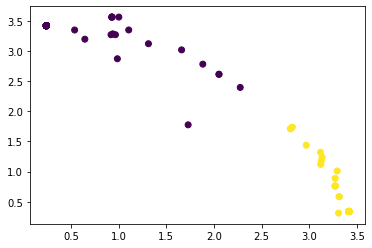

In [39]:
import matplotlib.pyplot as plt 

plt.scatter(x=senator_distances[:,0],y=senator_distances[:,1],c=labels)
plt.show()

In [40]:
senator_distances[:4]

array([[1.3134775 , 3.12141628],
       [2.05339992, 2.6146248 ],
       [3.41651746, 0.33960656],
       [0.24198446, 3.42004795]])

In [50]:
extremism = (senator_distances ** 3).sum(axis=1)

In [51]:
extremism

array([32.67874845, 26.53232295, 39.91878062, 40.01754021, 29.13829736,
       39.91878062, 40.01754021, 39.91878062, 40.01754021, 36.21608334,
       39.91878062, 35.88975006, 39.91878062, 37.71051208, 39.91878062,
       32.22150039, 32.72193513, 40.01754021, 40.01754021, 40.01754021,
       26.53232295, 36.60334976, 40.01754021, 40.01754021, 40.01754021,
       40.01754021, 46.04687308, 40.01754021, 27.75802391, 39.91878062,
       40.01754021, 40.01754021, 39.91878062, 40.01754021, 40.01754021,
       36.60334976, 35.76549954, 39.91878062, 32.94241771, 40.01754021,
       40.01754021, 35.48052818, 25.55784136, 36.27181661, 39.91878062,
       40.01754021, 40.01754021, 40.01754021, 40.01754021, 35.74013614,
       35.48052818, 32.10668699, 31.81620746, 46.04687308, 39.91878062,
       38.93892871, 28.23496639, 39.91878062, 40.01754021, 27.07301769,
       40.01754021, 39.91878062, 39.91878062, 39.91878062, 40.01754021,
       40.01754021, 39.91878062, 39.91878062, 36.76309959, 46.04

In [52]:
data['extremism'] = extremism
data.sort_values('extremism', inplace=True, ascending=False)
data.head(6)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.250476
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
48,Johnson,R,WI,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
